### Modeling Portfolio Risk: The efficient way


In this work we show how to construct a portfolio's multifactor risk model from drivers of volatily commonly called risk factors. 

A portfolio multifactor risk model is a model of its volatility as a function of apriori known risk factors. The latter are defined as independent variables that drive the variance of the considered portfolio. The term multifactor model is used when more that one risk factor are considered in factor modelling framework.  A factor model is a statistical model used to describe variability among observed correlated variables, in terms of potentially smaller number of unobserved variables called `factors`. $\\$


 In finance, most of the data-driven sub-tasks, including portfolio variance estimation or alpha strategy construction, start from modelling returns of underlying assets. However, it is possible that some of the returns of those assets vary together, which may lead to the assumption that some latent variables influences both of these returns. In this situation, we may  thus use a linear `multifactor model of returns` to model the returns of large group of stocks with a smaller set of variables explaining their common variability. 

Besides, for modelling a portfolio variance which is inherent to modelling asset returns, the multifactor risk model is shown to be a successful alternative approach to the well-known mean-variance framework. indeed, the curse of dimensionality that occurs with  the estimation of covariance of stock returns will be replaced with the covariance of limited number of factors of our choice, providing faster calculation or less time complexity. 


A generic multifactor model is represented as $$r_i = \sum_{k=1}^{K} \beta_{i, k} \times f_{k} + S_i $$

- $r_i$ is the time series return on asset i. 
- $f_{k}$ represents the return values of factor $k$.
- $\beta_{i, k}, \quad k=1,\dotsc, K$ represents the change in the return on asset i per unit change in factor $f_k$.
- $K$ is the number of factors. 
- $S_i$ represents the idiosyncratic return of asset i.  That is, the part of the return of asset i that is not explained or related to the $K$ factors.

Therefore, in finance, we can model the return of a stock, bond, mutual fund, etc. as a linear function of returns attributed to several factors.The well-known CAPM (Capital Asset Pricing Model) is actually a particular case of the multifactor model when $K=1$. In this scenario, $f_k$ is just the market excess return on the market portfolio (S&P 500, for instance). In this particular case, any two assets share the market risk because it is the only source of risk.  


If we now consider a portfolio $P$ of $N > 1$ assets with portfolio weights $x_1, x_2, \dotsc, x_N$. Then, with the multifactor model framework, we can model the portfolio's return time series $r_P$ as
$$r_P  = \sum_{k=1}^{K} \beta_{P, k} \times f_{k} + S_P  $$

where $\beta_{P, k}$ is the factor exposure of the portfolio to factor $f_k$ and it is obtained as the weighted average of the exposures $\left(\beta_{i, k}, i=1,\dotsc, N\right)$ from individual stocks to factor $f_k$. That is $$\beta_{P, k} = \sum_{i=1}^{N} x_i \times \beta_{i, k}$$

Likewise, the portfolio's specific return $S_P$ is the weighted average of the specific returns $\left(S_i, i=1,\dotsc, N \right)$ from individual stocks. That is $$S_p = \sum_{i=1}^{N} x_i \times S_i$$


Notice that  the portfolio multifactor return model formula is simply derived from the simple linear combination of the stock returns with the portfolio weights by replacing each stock return by its  multifactor model expression above. $\\$
The portfolio multifactor risk model is the standard deviation of the portfolio's return expressed in terms of the risk factors. To achieve that, we express the variance of the portfolio $r_P$ as $$\mathrm{Var}(r_P) = \mathrm{Cov}\left(\sum_{k=1}^{K} \beta_{P, k} \times f_{k} + S_P, \sum_{k=1}^{K} \beta_{P, k} \times f_{k} + S_P\right)$$

 To make an explicit model of the  portfolio's variance, we make the following assumptions:
 - $\mathrm{Cov}(S_i, S_j) = 0,\quad i\neq j$;
 - $\mathrm{Cov}(S_i, f_k) = 0,\quad \forall k, j$;
 
 These uncorrelation assumptions mean that all cross-correlation between asset returns is due to the risk factors $f_k$.$\\$

The variance of the portfolio is given by 
$$\mathrm{Var}(r_P) = \mathbf{X}^T \left(\mathbf{BFB}^T + \mathbf{S}\right)\mathbf{X}$$
where
- $ \mathbf{X}$ is the vector of lenght $N$ of the portfolio weights.
- $ \mathbf{B}$ is the $N \times K$ factor exposures.
- $ \mathbf{F}$ is the $K \times K$  factor covariance matrix.
- $ \mathbf{S}$ is $N \times N$ the idiosyncratic variance matrix.

 Modelling the risk of the portfolio is equilivant to estimating its standard deviation. Therefore,  calculating the variance and the standard deviation, using asset returns formula, yield the portfolio risk model as 
 $$ risk_P = \sqrt {\mathbf{X}^T \left(\mathbf{BFB}^T + \mathbf{S}\right)\mathbf{X}}$$


A good model of risk that can estimate a portfolio's risk is very important as the portfolio risk plays an important role in term of riks adjusted return of the given portfolio. A comprehence level of risk attracts investors especially risk averse investors. Indeed, suppose that the investment portfolio we design is actually a business product destined to to be sold in the market where buyers are investors. The latter would compare our portfolio's risk-adjusted return characteristic with others present in the market. Therefore, it is crucial to have a good and reasonable portfolio model of risk as a starting point to stay competitive. Now, deciding which constraint this risk has to be assigned is the next phase in the roadmap of portfolio construction. 

In this work, we are going to build a portfolio multifactor risk  model from two perspectives: Time Series Risk Models and PCA (Principal Components Analysis) Risk Models.

- For the Time Series Risk Models, we are going to use the Fama and French 5-factor model wich is considered as a benchmark portfolio that includes return time series of five potential drivers of volatility: RM (Market Return), SMB (Small Minus Big), HML (High Minus Low), RMW (Robust Minus Weak) and CMA (Conservative Minus Aggressive). 

- For the PCA Risk model approach, the goal is to reduce the dimensionality of our dataset (asset returns time series) by identifying the directions that explain the maximum amount of variance. This involves creating a new vector basis that captures the highest volatility in the data. The greater the variance of the dataset along a given direction, the larger the dispersion of the data along that direction, indicating a higher risk exposure of the portfolio in that direction. Using PCA and matrix transformations, we compute latent variables that represent potential drivers of risk (risk factors) in those directions. The factor exposures are the new vector basis, and the specific returns are deduced from matrix transformations on the original returns time series, factor exposures, and risk factors.








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 4)

#### Importing the module for selecting and cleaning  historical data.

We select a universe of stocks consisting of  the 10 most traded assets in ten years in terms of market capitalization with enough trading data.

In [3]:
# import the module helping to preprocess historical data
from import_and_clean_historic_data import select_and_process_historical_data

universe = select_and_process_historical_data(filename='HISTORIC_PRICES.csv')
print(universe.head())
print(universe.tail())
print('\n')
print(universe.info())

                       open       high       low      close       volume
ticker date                                                             
AAPL   2006-01-04  9.655252   9.764489  9.574288   9.634690  154900900.0
       2006-01-05  9.616698   9.625694  9.477903   9.558867  112355600.0
       2006-01-06  9.669389   9.857019  9.580714   9.805613  176114400.0
       2006-01-09  9.860874   9.921276  9.733646   9.773485  168760200.0
       2006-01-10  9.799188  10.524006  9.745212  10.391637  569967300.0
                        open       high        low      close      volume
ticker date                                                              
CSCO   2016-12-23  29.484966  29.542893  29.349802  29.475311   9167598.0
       2016-12-27  29.581511  29.755293  29.542893  29.620129  14175488.0
       2016-12-28  29.639438  29.707020  29.301529  29.369111  12022231.0
       2016-12-29  29.320838  29.494620  29.282220  29.407729  10995584.0
       2016-12-30  29.504275  29.542893  29.0

In [4]:
list_of_ticker = universe.index.unique('ticker').tolist()
list_of_ticker

['AAPL', 'GOOGL', 'MSFT', 'BAC', 'XOM', 'C', 'JPM', 'GE', 'INTC', 'CSCO']

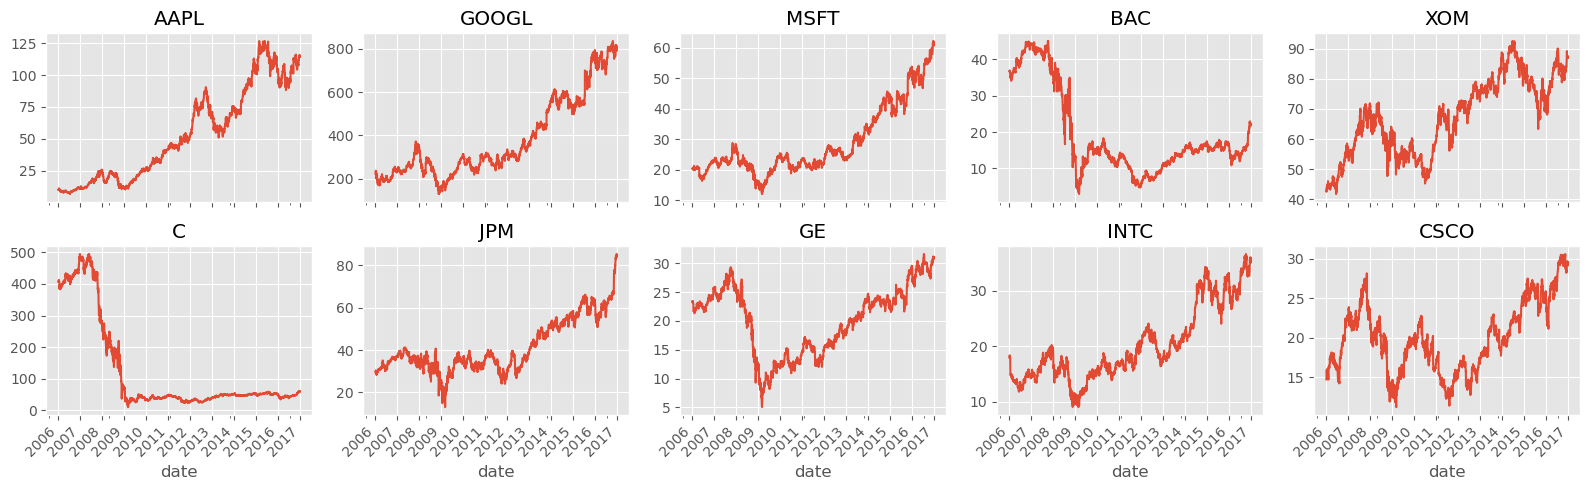

In [5]:
import matplotlib.dates as mdates

close_prices = universe.close.unstack('ticker').dropna()
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 5), sharex=True)
axes = axes.flatten()

for i, ticker in enumerate(list_of_ticker):

    ax = axes[i]
    close_prices[ticker].plot(ax=ax, title=ticker)
    ax.set_title(ticker)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.setp(ax.get_xticklabels(), rotation=45)
                 
                 
plt.tight_layout()                

## Fama and French risk factor

The Fama-French five-factor model is widely recognized as a benchmark in portfolio management. It incorporates five key drivers of asset returns: RM (Market Return), SMB (Small Minus Big), HML (High Minus Low), RMW (Robust Minus Weak), and CMA (Conservative Minus Aggressive). This model extends the original Fama-French three-factor model, which included only RM, SMB, and HML. The primary purpose of the Fama-French factor model is to quantify the influence of these factors on asset excess returns, thus providing a comprehensive framework for modeling portfolio risk.

The Fama-French risk factors are updated regularly and can be accessed through their [official website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). For our analysis, we will use the pandas_datareader library to retrieve the necessary time series data for these risk factors.

After obtaining the time series data, we will estimate the factor exposures (betas) for each stock by performing a linear regression of the stock's excess returns against the risk factors. Subsequently, we will calculate the specific returns by subtracting the estimated returns (from the regression) from the actual excess returns of the stocks.

In [6]:
import pandas_datareader.data as web
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm


In [7]:
factor_data = (web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', 
                              start=2006)[0].rename(columns={'Mkt-RF': 'MARKET'}))
factor_data.index.names = ['date']

In [8]:
risk_factor_names = factor_data.columns[:-1].tolist()
risk_factor_names

['MARKET', 'SMB', 'HML', 'RMW', 'CMA']

In [9]:
print(factor_data.head())
print('\n')
print(factor_data.tail())

            MARKET   SMB   HML   RMW   CMA     RF
date                                             
2006-01-03    1.50 -0.15  0.16  0.18 -0.32  0.017
2006-01-04    0.46  0.31  0.03 -0.45  0.33  0.017
2006-01-05    0.03  0.23 -0.10 -0.55  0.20  0.017
2006-01-06    0.92  0.10 -0.24 -0.04  0.14  0.017
2006-01-09    0.45  0.51 -0.17  0.06 -0.03  0.017


            MARKET   SMB   HML   RMW   CMA     RF
date                                             
2024-06-24   -0.26  0.63  1.11  0.00  0.65  0.022
2024-06-25    0.31 -0.81 -1.20  0.10 -1.21  0.022
2024-06-26    0.16  0.00 -0.20  0.45 -0.27  0.022
2024-06-27    0.14  0.51 -0.36 -1.01 -0.12  0.022
2024-06-28   -0.35  1.00  1.29 -0.20  0.71  0.022


### Factor Exposure Estimates
Here the factor exposures have to estimated. Indeed, we are provided with a time series of risk factors and we have the time series of asset returns. Hence, we estimates the factor exposures using a multiple linear regression analysis. We will use the Ordinary Leas Square regression from `statsmodels`. Subsequently, we will calculate the specific returns by subtracting the estimated returns (from the regression) from the actual excess returns of the stocks.

In [10]:
# The daily returns of the assets
daily_ret = universe.pct_change().dropna().close.unstack('ticker').dropna()
print(daily_ret.head(3))
print(daily_ret.tail(3))

ticker          AAPL     GOOGL      MSFT       BAC       XOM         C  \
date                                                                     
2006-01-05 -0.007870  0.013476  0.000742  0.001288 -0.004951  0.004961   
2006-01-06  0.025813  0.031956 -0.002964 -0.001501  0.019732  0.000000   
2006-01-09 -0.003277  0.002663 -0.001858  0.000644 -0.000505 -0.004731   

ticker           JPM        GE      INTC      CSCO  
date                                                
2006-01-05  0.003029 -0.002548  0.013898  0.028011  
2006-01-06  0.007046  0.006812  0.001523  0.022888  
2006-01-09  0.016242 -0.002537  0.006081  0.015450  
ticker          AAPL     GOOGL      MSFT       BAC       XOM         C  \
date                                                                     
2016-12-28 -0.004264 -0.006618 -0.004583 -0.012384 -0.004959 -0.017188   
2016-12-29 -0.000257 -0.002101 -0.001429 -0.014778  0.000554 -0.010993   
2016-12-30 -0.007796 -0.012991 -0.012083  0.004545 -0.000996  0.0008

In [11]:
def estimate_factor_exposure_and_specific_returns(daily_ret, risk_factor_df, risk_factor_names, ticker_list):
    ''' 
        Inputs: 
                - daily_returns     [DataFrame] -->  daily returns of selected assets
                - risk_factor_df    [DataFrame] -->  fama-french factor data
                - risk_factor_names [list]      -->  fama-french risk factor names 
                                    ['MARKET', 'SMB', 'HML', 'RMW', 'CMA']
                
        RETURN:      
        The function will return a dictionary containing:
                - DataFrame of factor exposures for all asset
                - DataFrame of specific returns for all each 
                - DataFrame of the risk factors having the same datetime index as 
                  the specific returns DataFrame
    '''
    betas = []
    specific_returns = []
    for ticker in ticker_list:

        df = daily_ret[[ticker]]
        model_data = df.merge(risk_factor_df, on='date').dropna()

        ols_model = sm.OLS(endog=model_data[ticker], exog=sm.add_constant(model_data[risk_factor_names]))
        factor_model = ols_model.fit()
        factor_model = factor_model.params.rename({'const':'intercept'})
        
        beta_estimates = pd.DataFrame(factor_model).rename(columns={0:ticker}).T.drop(['intercept'], axis=1)
        betas.append(beta_estimates)

        # specific return
        risk_factors = model_data.drop([ticker, 'RF'], axis=1)
        common_ret = risk_factors.dot(beta_estimates.values.T).rename(columns={0:'common_ret'})
        specific_ret = model_data[[ticker]].subtract(common_ret['common_ret'], axis=0)
        specific_returns.append(specific_ret)

    factor_exposures_df = pd.concat(betas, axis=0)
    specific_returns_df = pd.concat(specific_returns, axis=1)
    estimated_data_dict = {'beta exposures':factor_exposures_df, 
                    'specific returns':specific_returns_df,
                    'risk factors': risk_factors}
        
    return estimated_data_dict

estimated_data = estimate_factor_exposure_and_specific_returns(daily_ret, factor_data, risk_factor_names, list_of_ticker)

beta_exposures_df = estimated_data['beta exposures']
specific_returns_df = estimated_data['specific returns']
risk_factors = estimated_data['risk factors']

In [12]:
print(f'Factor exposures beta:\n {beta_exposures_df}')

Factor exposures beta:
          MARKET       SMB       HML       RMW       CMA
AAPL   0.009882 -0.000646 -0.001379  0.001776 -0.015058
GOOGL  0.009442 -0.001472 -0.002167 -0.002674 -0.010421
MSFT   0.010927 -0.003419 -0.003401  0.002835  0.000955
BAC    0.011639 -0.004988  0.027172 -0.012821 -0.020723
XOM    0.011070 -0.004142 -0.001288  0.007326  0.003356
C      0.012211 -0.005627  0.023762 -0.016011 -0.022144
JPM    0.010634 -0.000967  0.019431 -0.004586 -0.011780
GE     0.010188 -0.001343  0.004778 -0.000948  0.001619
INTC   0.011333 -0.000786 -0.002440  0.002433  0.002772
CSCO   0.011048 -0.001095 -0.002173 -0.000511  0.001125


In [13]:
print(f'Specific returns:\n {specific_returns_df.head()}')

Specific returns:
                 AAPL     GOOGL      MSFT       BAC       XOM         C  \
date                                                                     
2006-01-05 -0.004167  0.013928  0.002228  0.001896 -0.001102  0.003888   
2006-01-06  0.018635  0.024249 -0.013512 -0.002801  0.009476 -0.002509   
2006-01-09 -0.008187 -0.001355 -0.005752  0.002717 -0.003932 -0.003020   
2006-01-10  0.062074  0.005226  0.007262 -0.010340  0.011061  0.000939   
2006-01-11  0.037695  0.001496  0.007208 -0.005140  0.004515  0.004685   

                 JPM        GE      INTC      CSCO  
date                                                
2006-01-05  0.004709 -0.002913  0.014279  0.027208  
2006-01-06  0.003488 -0.001545 -0.009701  0.012135  
2006-01-09  0.015175 -0.005519  0.000905  0.010732  
2006-01-10 -0.000622 -0.005179 -0.012666 -0.004560  
2006-01-11 -0.001496  0.003500 -0.002488  0.018653  


In [14]:
print(f'Risk factors:\n {risk_factors}')

Risk factors:
             MARKET   SMB   HML   RMW   CMA
date                                      
2006-01-05    0.03  0.23 -0.10 -0.55  0.20
2006-01-06    0.92  0.10 -0.24 -0.04  0.14
2006-01-09    0.45  0.51 -0.17  0.06 -0.03
2006-01-10    0.05  0.59  0.02 -0.15 -0.09
2006-01-11    0.28 -0.28 -0.11 -0.36  0.17
...            ...   ...   ...   ...   ...
2016-12-23    0.19  0.53 -0.50 -0.36 -0.15
2016-12-27    0.27  0.23  0.14  0.17  0.04
2016-12-28   -0.87 -0.29  0.09  0.17 -0.15
2016-12-29   -0.04  0.10 -0.33  0.27  0.02
2016-12-30   -0.52 -0.06  0.20 -0.11  0.03

[2767 rows x 5 columns]


#### Cumulative Factor Returns by Date

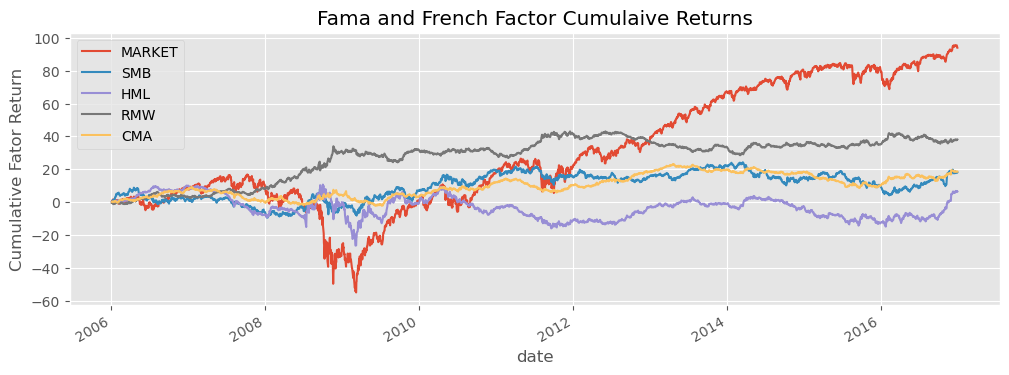

In [15]:
plt.rcParams['figure.figsize'] = (12, 4)
risk_factors.cumsum().plot();
plt.ylabel('Cumulative Fator Return')
plt.title('Fama and French Factor Cumulaive Returns')
plt.legend()
plt.show()

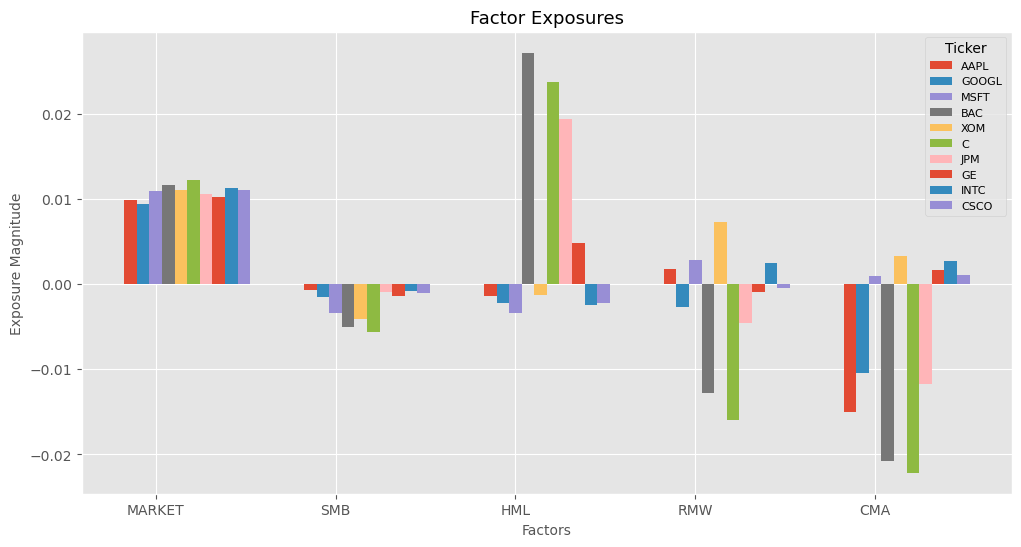

In [16]:

fig, ax = plt.subplots(figsize=(12, 6))
num_tickers = len(beta_exposures_df.index)
num_factors = len(beta_exposures_df.columns)
bar_width = 0.07
indices = np.arange(num_factors)


for i, ticker in enumerate(beta_exposures_df.index):
    bar_positions = indices + i * bar_width
    ax.bar(bar_positions, beta_exposures_df.loc[ticker], width=bar_width, label=ticker)
    
ax.set_xlabel('Factors', fontsize=10)
ax.set_ylabel('Exposure Magnitude', fontsize=10)
ax.set_title('Factor Exposures', fontsize=13)
             
ax.set_xticks(indices + bar_width * (num_factors / 2) - bar_width / 2)
ax.set_xticklabels(risk_factor_names)

ax.legend(title='Ticker', fontsize=8);

###  Interpretation of the estimated factor exposures

- Positive Exposure: Indicates that the asset's returns are positively correlated with the factor. The asset behaves similarly to the factor's underlying characteristics.
- Negative Exposure: Indicates that the asset's returns are negatively correlated with the factor. The asset behaves oppositely to the factor's underlying characteristics.

We can see that all the assets in our portfolio have together a positve exposure to the MARKET risk factor and a  negative exposure to the SMB risk factor. 

 This indicates that the asset's returns tend to move in the same direction as the MARKET. If the MARKET goes up, the asset's returns are expected to go up, and vice versa. The magnitude of the beta indicates the sensitivity to the MARKET movements.The bars being relatively similar in magnitude, indicate that these stocks are similarly influenced by market movements.
- Example: A beta of $1.2$ means that if the market return increases by $1 \%$, the asset's return is expected to increase by $1.2 \%$.


In the contrary, the stocks exposures to SMB are mostly negative, which suggests that these stocks are likely large-cap stocks. A negative exposure to SMB means the stock’s returns are more correlated with larger companies rather than smaller ones.
- Example: A beta of $-0.5$ indicates that if small-cap stocks outperform large-cap stocks by $1 \%$, the asset's return is expected to decrease by $0.5 \%$. $\\$
This scenario is quite interesting because it aligns with our stock selection strategy, where we opted to select the 10 largest market cap stocks on average over 10 years.


### Estimate the Portfolio multifactor risk  via  Fama-French five-factor 

$$risk_P = \sqrt {\mathbf{X}^T \left(\mathbf{BFB}^T + \mathbf{S}\right)\mathbf{X}} $$


##### Specific return variance matrix  S

In [17]:
S = 252*np.diag(specific_returns_df.var(ddof=1))
print(f'Annualized specific return variance matrix S:\n\n {S}')

Annualized specific return variance matrix S:

 [[0.06752404 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.05204895 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.03799559 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.07938872 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.0217054  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.12361018
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.04043999 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.03780011 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.04

##### Factor returns covariance matrix F

In [18]:
F = 252*np.cov(risk_factors.T, ddof=1)
print(f'annualiazed Factor covariance matirx  F:\n\n {F}')

annualiazed Factor covariance matirx  F:

 [[ 4.09954118e+02  5.15748649e+01  9.18623212e+01 -4.82980540e+01
  -1.13837867e+01]
 [ 5.15748649e+01  8.67654599e+01  1.10352648e+01 -1.70181856e+01
  -4.98692589e-01]
 [ 9.18623212e+01  1.10352648e+01  1.22944428e+02 -2.96420833e+01
   1.14865772e+01]
 [-4.82980540e+01 -1.70181856e+01 -2.96420833e+01  3.56217881e+01
  -5.85016343e-02]
 [-1.13837867e+01 -4.98692589e-01  1.14865772e+01 -5.85016343e-02
   2.05495469e+01]]


##### Factor exposures Matrix B

In [19]:
B = beta_exposures_df.values
print(f'Factor exposures matrix B:\n\n {B}')

Factor exposures matrix B:

 [[ 0.00988228 -0.00064641 -0.00137876  0.00177618 -0.01505791]
 [ 0.00944181 -0.00147243 -0.00216668 -0.00267358 -0.01042114]
 [ 0.0109274  -0.00341856 -0.00340143  0.00283502  0.00095463]
 [ 0.01163933 -0.00498769  0.02717226 -0.01282116 -0.02072299]
 [ 0.01106969 -0.00414152 -0.00128834  0.00732591  0.00335644]
 [ 0.01221073 -0.00562675  0.02376236 -0.01601063 -0.02214366]
 [ 0.01063424 -0.00096729  0.01943094 -0.00458594 -0.01178047]
 [ 0.01018846 -0.00134332  0.00477773 -0.00094838  0.00161928]
 [ 0.01133307 -0.00078635 -0.00243985  0.00243307  0.0027715 ]
 [ 0.0110475  -0.00109518 -0.00217322 -0.00051118  0.00112472]]


### Estimate Portfolio Risk

##### Portfolio weights

Here we just select random wights in order to calculate the portfolio variance. However, in practice we will be looking for optimal  weights that must be the result of the portfolio optimiation aiming to minimize the portfolio risk and maximize investment profit (this will be a another work).

In this example, we will choose the weights to be all  all positive meaning that we are going long on all assets.  

In [20]:
np.random.seed(42)
X = np.random.random(10) / np.sum(np.random.random(10)) 

print(f'Portfolio weights X:\n\n {X}')

Portfolio weights X:

 [0.09475603 0.24052407 0.18518935 0.15145641 0.03947163 0.03946552
 0.01469475 0.21913651 0.15207789 0.17913741]


In [21]:
def portfolio_risk(B, S, F, X):
    
    risk_p = np.sqrt(np.dot(np.dot(X.T, (np.dot(np.dot(B, F), B.T) + S)), X))
    
    return risk_p

In [22]:
risk_p = portfolio_risk(B, S, F, X)
                        
print(f'Estimated Portfolio  Risk: \n\n {risk_p}')

Estimated Portfolio  Risk: 

 0.327479772338992


The portfolio is is over $33\%$

## Construct the PCA Risk Factor Model

Unlike the Fama-French model, where we are provided with a dataset of risk factors, there may be situations where such datasets do not exist or are not relevant to use. In these situations, alternatives do exist. Indeed, PCA analysis can be used to reduce the dataset's dimension according to the direction of its maximal variance. That is, we must estimate the risk factors, factor exposures, and specific returns using the PCA framework. As explained in the introduction, we will estimate the risk factors as latent variables from the PCA framework. The factor exposures will be estimated as the new vector basis of the reduced dataset, and the specific returns will be deduced from matrix transformations on the original returns time series, factor exposures, and risk factors. In this way, we will have a new represention of the dataset's return time series that captures a maximum amount of their variance.


The PCA framework is used to reproduce risk factors by following the PCA algorithms and by mapping its outputs to each of the following matrices:

 $$ \mathbb{r} = \mathbf{b} \mathbf{f} + \mathbf{s}$$ 
 
 
 
 - $\mathbb{r}$ is the return matrix time series of dimension number of stocks times number of time steps.
 - $\mathbf{b}$ is the matrix of factor exposures of dimension number of stocks times number of factors.
 - $\mathbf{f}$ is the matrix of factor returns of dimension number of factors times number of time steps.
 - $\mathbf{s}$ is the specfic return matrix time series of dimension number of stocks times number of time steps.


In the following, we implement the necessary helper functions to estimate each of these matrices  as welll well as the variance and covariance matrices needed to estimate the 
portfolio risk. 



In [23]:
def fit_pca(returns, num_factor_exposures, svd_solver):
    
    pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns)
    
    return pca

def factor_betas(pca,factor_betas_indices, factor_betas_columns):
    
    assert len(factor_betas_indices.shape) == 1
    assert len(factor_betas_columns.shape) == 1
    
    factor_betas = pd.DataFrame(pca.components_.T, index=factor_betas_indices, columns=factor_betas_columns)
    
    return factor_betas

def factor_returns_and_covariance(pca, returns, factor_returns_indices, factor_returns_columns, ann_factor):
    
    assert len(factor_returns_indices.shape) == 1
    assert len(factor_returns_columns.shape) == 1

    factor_returns = pd.DataFrame(pca.transform(returns), index=factor_returns_indices, columns=factor_returns_columns)
    factor_ret_cov = np.diag(factor_returns.var(axis=0, ddof=1)*ann_factor)

    factor_ret_and_cov_dict = {'factor returns': factor_returns, 
                               'factor returns covariance': factor_ret_cov}
    
    return factor_ret_and_cov_dict

def specific_returns_and_variance(returns, factor_returns, factor_betas, ann_factor):
    
    common_returns = pd.DataFrame(np.dot(factor_returns, factor_betas.T), index=returns.index, columns=returns.columns)
    specific_returns = returns - common_returns
    
    # make a dictionary that will contain both the specific returns and its variance matrix
    specific_variance = pd.DataFrame(np.diag(np.var(specific_returns)*ann_factor),index=returns.columns, columns=returns.columns)
    specific_ret_and_var_dict = {'specific returns': specific_returns, 
                        'specific variance': specific_variance}
    return specific_ret_and_var_dict

Now we create the class `RiskModel` where the previous helper functions are called to assign values to the class attributes  `factor_betas_`, `factor_returns_and_covariance_dict_ ` and  `specific_returns_and_variance_dict_`.

The number of factor returns chosen is $5$ and annulized covariance and variance matrice are calculated. 

In [24]:
# Create the risk model

class RiskModel(object):
    
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):
        
        self.factor_betas_ = factor_betas(pca, 
                                          returns.columns.values, 
                                          np.arange(num_factor_exposures))
        
        self.factor_returns_and_covariance_dict_ = factor_returns_and_covariance(pca, 
                                                                                 returns, 
                                                                                 returns.index, 
                                                                                 np.arange(num_factor_exposures), 
                                                                                 ann_factor)
        self.specific_returns_and_variance_dict_ = specific_returns_and_variance(returns, 
                                                                                 self.factor_returns_and_covariance_dict_['factor returns'], 
                                                                                 self.factor_betas_, 
                                                                                 ann_factor)
        
ann_factor = 252
num_factor_exposures = 5
svd_solver = 'full'
pca = fit_pca(daily_ret, num_factor_exposures, svd_solver)
risk_model = RiskModel(daily_ret, ann_factor, num_factor_exposures, pca)
        

In [25]:
pca_factor_betas = risk_model.factor_betas_

print(f"Factor Exposures:\n\n {pca_factor_betas}")

Factor Exposures:

               0         1         2         3         4
AAPL   0.183333  0.440149  0.350350  0.661144 -0.438813
GOOGL  0.172171  0.361955  0.147861  0.236136  0.830900
MSFT   0.166258  0.343225 -0.044058 -0.285200  0.122200
BAC    0.538933 -0.306276 -0.450885  0.275585 -0.014261
XOM    0.148027  0.239537 -0.087220 -0.240276  0.016466
C      0.559170 -0.382626  0.684526 -0.258292  0.006760
JPM    0.393759 -0.052084 -0.366830  0.132301  0.069337
GE     0.235336  0.132587 -0.172434 -0.051586 -0.154009
INTC   0.188264  0.348121 -0.091739 -0.318400 -0.214781
CSCO   0.195448  0.344076 -0.035445 -0.322260 -0.164128


In [26]:
pca_risk_factors_and_covariance = risk_model.factor_returns_and_covariance_dict_
print(f"Factor Returns:\n\n {pca_risk_factors_and_covariance['factor returns']}") 

Factor Returns:

                    0         1         2         3         4
date                                                        
2006-01-05  0.011215  0.011010 -0.000344 -0.015468  0.007739
2006-01-06  0.019786  0.034879  0.008291  0.012443  0.010610
2006-01-09  0.005934  0.005466 -0.010637 -0.004702  0.001094
2006-01-10  0.006585  0.026898  0.029967  0.042434 -0.017170
2006-01-11  0.018848  0.028426  0.018334  0.009511 -0.016612
...              ...       ...       ...       ...       ...
2016-12-23  0.005565 -0.005882  0.004141 -0.000346 -0.004132
2016-12-27  0.003718  0.004817  0.002750  0.001299 -0.001882
2016-12-28 -0.029121 -0.005326 -0.002751  0.004441  0.000240
2016-12-29 -0.018172  0.007488  0.001310 -0.003838 -0.002546
2016-12-30 -0.006632 -0.022511 -0.005215  0.002641 -0.004445

[2767 rows x 5 columns]


In [27]:
print(f"Factor Returns Covariance Matrix:\n\n {pca_risk_factors_and_covariance['factor returns covariance']}") 

Factor Returns Covariance Matrix:

 [[0.92195642 0.         0.         0.         0.        ]
 [0.         0.17102635 0.         0.         0.        ]
 [0.         0.         0.07201707 0.         0.        ]
 [0.         0.         0.         0.06553986 0.        ]
 [0.         0.         0.         0.         0.04930966]]


In [28]:
pca_specific_returns_and_variance = risk_model.specific_returns_and_variance_dict_
print(f"Specific Returns:\n\n {pca_specific_returns_and_variance['specific returns']}") 


Specific Returns:

 ticker          AAPL     GOOGL      MSFT       BAC       XOM         C  \
date                                                                     
2006-01-05 -0.001029  0.004833 -0.010274  0.002834 -0.013123 -0.000910   
2006-01-06  0.000358  0.002945 -0.015607 -0.001021  0.011987 -0.000251   
2006-01-09  0.000545  0.001437 -0.006664 -0.004364 -0.004768  0.000102   
2006-01-10  0.004113 -0.004929  0.010406 -0.002107  0.013418  0.000273   
2006-01-11  0.001627 -0.000707  0.003401  0.001576  0.001408 -0.000580   
...              ...       ...       ...       ...       ...       ...   
2016-12-23  0.000512  0.001752 -0.003196 -0.000235 -0.000829  0.000008   
2016-12-27  0.000901  0.001104 -0.000917  0.000769 -0.000680 -0.000131   
2016-12-28  0.001552 -0.000518  0.003203 -0.000782  0.001451  0.000086   
2016-12-29  0.000740  0.001146 -0.001703 -0.001080  0.000684  0.000163   
2016-12-30  0.001458  0.000140 -0.002187 -0.001917  0.005631  0.000219   

ticker           

In [29]:
print(f"Specific Variance Matrix:\n\n {pca_specific_returns_and_variance['specific variance']}")


Specific Variance Matrix:

 ticker      AAPL     GOOGL      MSFT       BAC       XOM         C       JPM  \
ticker                                                                         
AAPL    0.000702  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
GOOGL   0.000000  0.002418  0.000000  0.000000  0.000000  0.000000  0.000000   
MSFT    0.000000  0.000000  0.025015  0.000000  0.000000  0.000000  0.000000   
BAC     0.000000  0.000000  0.000000  0.013522  0.000000  0.000000  0.000000   
XOM     0.000000  0.000000  0.000000  0.000000  0.026999  0.000000  0.000000   
C       0.000000  0.000000  0.000000  0.000000  0.000000  0.000228  0.000000   
JPM     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.026314   
GE      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
INTC    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
CSCO    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

ticker     

#### Explained variance

Geometrically speaking, principal components (PCs) represent the directions in the data that explain the maximum amount of variance. These are the lines that capture most of the information in the data. Without going into details, PCs are orthogonal eigenvectors. The largest eigenvector always points in the direction of the largest variance of the data, and its magnitude corresponds to the associated eigenvalue.

In the context of risk factor modeling, the PCs are the vectors of factor exposures. Each vector corresponds to a risk factor, and each component of that vector corresponds to a stock.

The number of PCs chosen determines the amount of variance of the original data that is retained.

In this study, we choose to retain 5 principal components. The corresponding eigenvalues can also be obtained directly with Python.

Below, we illustrate how much variance of the original data is retained with 5 PCs.


In [30]:
explained_variance =  pd.DataFrame({'explained_variance':pca.explained_variance_ratio_,})

print(f"The explained variance:\n\n {explained_variance}")

The explained variance:

    explained_variance
0            0.632059
1            0.117249
2            0.049372
3            0.044932
4            0.033805


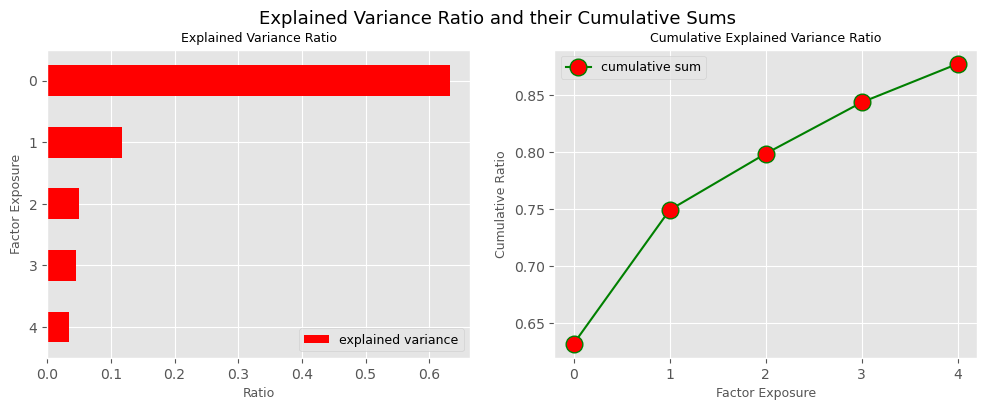

In [31]:
fig, ax = plt.subplots(1,2, sharey=False)
                                                         
explained_variance.sort_index(ascending=False).plot.barh(ax=ax[0],
                                                         color='r')
ax[0].set_xlabel('Ratio', fontsize=9)
ax[0].set_ylabel('Factor Exposure', fontsize=9)
ax[0].set_title('Explained Variance Ratio', fontsize=9)
ax[0].legend(['explained variance'], fontsize=9)

explained_variance.cumsum().plot(ax=ax[1], 
                                 marker='o', 
                                 markerfacecolor='r', 
                                 markersize=12,
                                 color='g', 
                                 linestyle='solid')
                                                          
ax[1].set_xlabel('Factor Exposure', fontsize=9)
ax[1].set_ylabel('Cumulative Ratio', fontsize=9)
ax[1].set_title('Cumulative Explained Variance Ratio', fontsize=9)
ax[1].legend(['cumulative sum'], fontsize=9)
ax[1].set_xticks(np.arange(5))

fig.suptitle('Explained Variance Ratio and their Cumulative Sums', fontsize=13)


plt.show()

The left figure shows the explained variance ratio of the original data, and the right figure shows their cumulative sums.

In the left figure, the explained variances are sorted in descending order. The first explained variance ratio is associated with the highest eigenvalue, corresponding to the principal component that captures the maximum variance of the original data. The second explained variance ratio corresponds to the second highest eigenvalue, and so on.

The right figure shows the cumulative sums of the explained variances. From this figure, we observe that the cumulative explained variance reaches around $87\%$ of the total variance of the original data. This indicates that approximately $87\%$ of the variance in the original data can be captured by the considered principal components, which is sufficient for capturing the essential variance of the original data.

#### Cumulative Factor Returns by Date

Here we just want to show the cumulative returns of the previously computed risk factors. Unlike the Fama-French factor returns, these factor returns may not have a direct interpretations as they are just latent variables. however, we can see that they exhibit true dynamics of factor retuns.  $\\$
In particular, we see the striking similarity between the MARKET risk factor in the Fama-French and the first dominant risk factor in the PCA model.

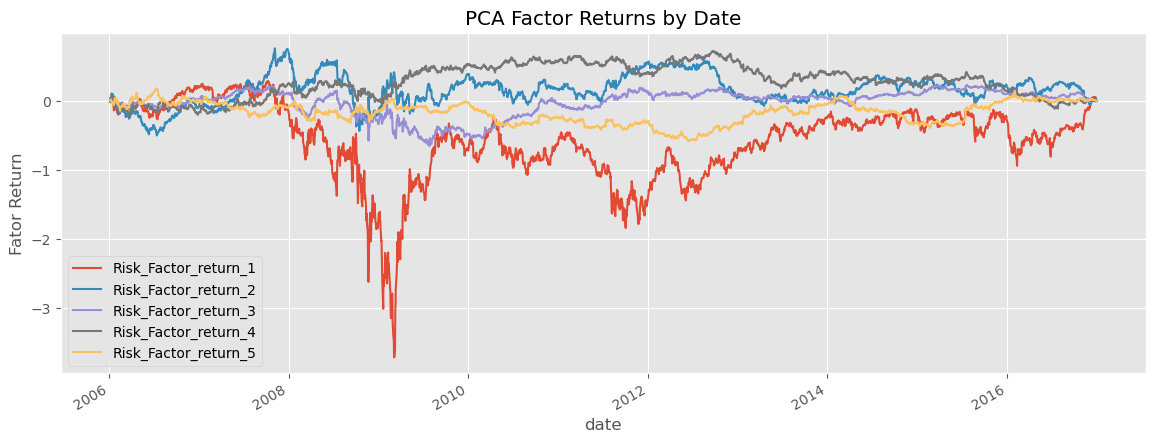

In [32]:
factor_returns_result = pca_risk_factors_and_covariance['factor returns'].rename(columns = lambda x: 'Risk_Factor_return_' + str(1+x))
plt.rcParams['figure.figsize'] = (14, 5)
(factor_returns_result).cumsum().plot();
plt.ylabel('Fator Return')
plt.title('PCA Factor Returns by Date')
plt.legend()
plt.show()

In [33]:
factor_returns_result.columns

Index(['Risk_Factor_return_1', 'Risk_Factor_return_2', 'Risk_Factor_return_3',
       'Risk_Factor_return_4', 'Risk_Factor_return_5'],
      dtype='object')

#### Factor Exposure by Ticker

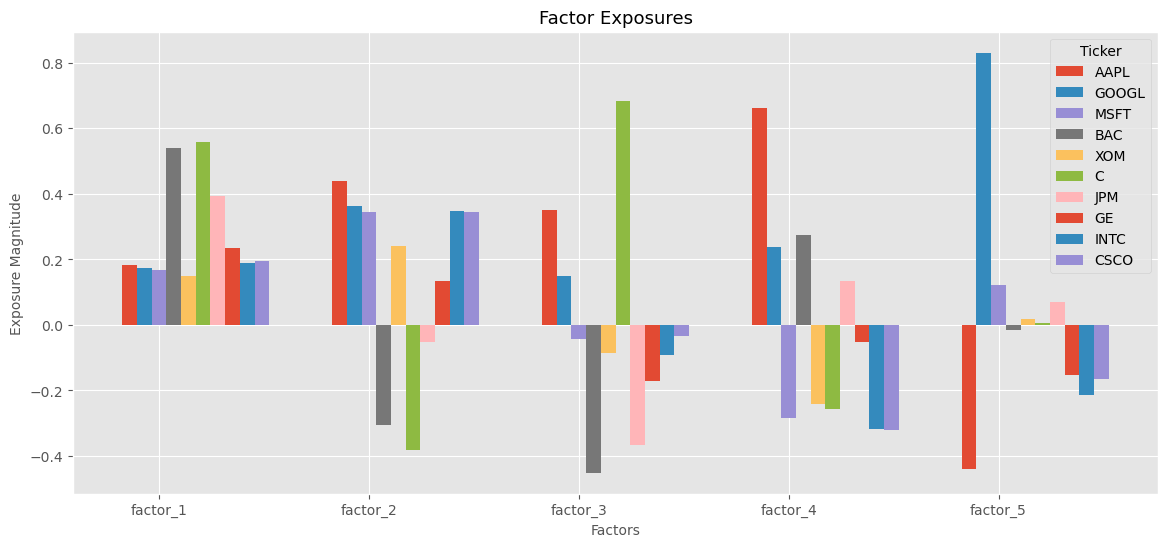

In [34]:
fig, ax = plt.subplots(figsize=(14, 6))
num_tickers = len(pca_factor_betas.index)
num_factors = len(pca_factor_betas.columns)
bar_width = 0.07
indices = np.arange(num_factors)


for i, ticker in enumerate(pca_factor_betas.index):
    bar_positions = indices + i * bar_width
    ax.bar(bar_positions, pca_factor_betas.loc[ticker], width=bar_width, label=ticker)
    
ax.set_xlabel('Factors', fontsize=10)
ax.set_ylabel('Exposure Magnitude', fontsize=10)
ax.set_title('Factor Exposures', fontsize=13)
             
ax.set_xticks(indices + bar_width * (num_factors / 2) - bar_width / 2)
ax.set_xticklabels(['factor_1', 'factor_2', 'factor_3', 'factor_4', 'factor_5'])

ax.legend(title='Ticker');


We see that all the assets in our portfolio have together a positve exposure to the first risk factor. 

 This indicates that the underlying  stocks tend to move in the same direction as the risk factor. If this risk  factor moves up, we expect the assets to move up as well, and vice versa. The magnitude of the beta indicates the sensitivity of the stocks movements to the first risk factor.

 In the PCA approach, the first and dominant  risk factor behaves exactly as the MARKET factor in the Fama-French model.


### Estimate Portfolio Risk

##### Portfolio weights

Here for the sake of illustration, we just select random wights in order to calculate the portfolio variance. However, in practice we will be looking for optimal  weights that must be the result of the portfolio optimiation. That means, the weights will be variables or unknowns to be found. 

In this example, we will choose the weights to be all  all positive meaning that we are going long on all assets.  

In [35]:
np.random.seed(42)
X = np.random.random(10) / np.sum(np.random.random(10)) 

print(f'Portfolio weights X:\n\n {X}')

Portfolio weights X:

 [0.09475603 0.24052407 0.18518935 0.15145641 0.03947163 0.03946552
 0.01469475 0.21913651 0.15207789 0.17913741]


In [36]:
# covariance matrix of factor returns
F_pca = pca_risk_factors_and_covariance['factor returns covariance']
# Variance matrix of specific returns
S_pca = pca_specific_returns_and_variance['specific variance'].values
# Matrix of factor exposures
B_pca =pca_factor_betas.values

risk_p = portfolio_risk(B_pca, S_pca, F_pca, X)

print(f'Estimated Portfolio  Risk: \n\n {risk_p}')

Estimated Portfolio  Risk: 

 0.3363565228047627


## Conclusion
Factor exposures help investors understand the sources of risk and return for an asset or portfolio. By analyzing these exposures, investors can make informed decisions about portfolio construction, risk management, and performance evaluation.

In this work, we have studied two approaches to estimate portfolio risk using the advanced multifactor model.

The first approach is known as the time series approach with the Fama-French 5-factor model. In this approach, the risk factors are explicitly provided.

The second approach is known as the statistical multifactor model. In this approach, the stock time series are used within a PCA framework to compute both risk factors and factor exposures.

Our results have shown that the MARKET risk factor in the Fama-French model may be approximated by the first dominant risk factor in the PCA statistical approach. The PCA approach is thus a credible approach to be considered, especially when there is a lack of available risk factor data out there. This assertion is stronger when one can see that for the same set of weights we have approximately the same  expected risk for both approaches.

In the industry, risk factors are usually commercial products that can be purchased by (institutional) traders for the construction of portfolio multifactor risk models. However, in the absence of commercial risk factors, a comprehensive set of risk factors may be constructed by combining the Fama-French model and the statistical PCA model, excluding the first dominant risk factor of one one them to avoid repeating the first dominant factor.

This task is very important because it is the preliminary work to be done before embarking on the portfolio optimization journey.